# Read in MBTA yaml file from Erik Demaine, turn it into a Pandas Dataframe

In [2]:
import yaml

mbtafile = open("../Data/Boston/mbta.yaml", "r")
mbtayaml = yaml.load(mbtafile)

In [52]:
title = []
latitude = []
longitude = []
for i in range(len(mbtayaml)):
    istation = mbtayaml[i]['stations']
    for j in range(len(istation)):
        try:
            ijtit = istation[j]['title']
            ijlat = istation[j]['latitude']
            ijlong = istation[j]['longitude']
            ijstation = istation[j]['lines']
            print(ijtit)
            title.append(ijtit)
            latitude.append(ijlat)
            longitude.append(ijlong)
        except:
            pass
        

Alewife Station
Davis Station
Porter Square Station
Harvard Square Station
Central Station
Kendall/MIT Station
Charles/Massachusetts General Hospital Station
Park Street Station
Downtown Crossing Station
South Station
Broadway Station
Andrew Station
JFK / UMass Station
JFK / UMass Station
Savin Hill Station
Fields Corner Station
Shawmut Station
Ashmont Station
Ashmont Station
Cedar Grove Station
Butler Station
Milton Station
Central Avenue Station
Valley Road Station
Capen Street Station
Mattapan Station
JFK / UMass Station
North Quincy Station
Wollaston Station
Quincy Center Station
Quincy Adams Station
Braintree Station
Lechmere Station
Science Park Station
North Station
Haymarket Station
Government Center Station
Park Street Station
Boylston Street Station
Arlington Station
Copley Station
Copley Station
Hynes Convention Center/ICA Station
Kenmore Station
Kenmore Station
Blandford Street Station
Boston University East Station
Boston University Central Station
Boston University West S

In [56]:
d = {'stationname' : title, 'latitude' : latitude, 'longitude': longitude}

In [57]:
import pandas as pd
df = pd.DataFrame(d)

In [73]:
df = df.drop_duplicates()

In [75]:
mbtarides = pd.read_csv('../Data/Boston/mbtastation.csv')

In [76]:
mbtarides = mbtarides.merge(df, on='stationname')

In [77]:
mbtarides.to_csv('../Data/Boston/mbtarideratelocation.csv')

In [69]:
mbtarides

,stationname,ridesperday,latitude_x,longitude_x,latitude_y,longitude_y
0,Oak Grove Station,6590,42.435343,-71.071190,42.435343,-71.071190
1,Malden Center Station,12686,42.427313,-71.073872,42.427313,-71.073872
2,Wellington Station,7609,42.404296,-71.077005,42.404296,-71.077005
3,Sullivan Square Station (Broadway Exit),10125,42.385755,-71.077080,42.385755,-71.077080
4,Wonderland Station,6105,42.414246,-70.992144,42.414246,-70.992144
5,Revere Beach Station,3197,42.407163,-70.992193,42.407163,-70.992193
6,Beachmont Station,3045,42.397419,-70.992193,42.397419,-70.992193
7,Suffolk Downs Station,1125,42.388402,-71.000358,42.388402,-71.000358
8,Alewife Station,11221,42.394907,-71.140981,42.394907,-71.140981
9,Davis Station,12857,42.396064,-71.122055,42.396064,-71.122055


[-71.15, -71.04, 42.31, 42.41]

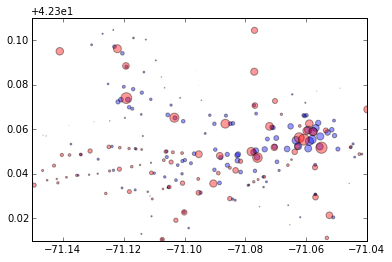

In [85]:
%matplotlib inline
ridedata = pd.read_csv('../Data/Boston/FeaturesGroup2.csv')
mbtadata = pd.read_csv('../Data/Boston/mbtarideratelocation.csv')

plt.scatter(ridedata['lng'], ridedata['lat'], s=ridedata['originsubway']/1e3,
        c='blue', alpha=0.4) 
plt.scatter(mbtadata['longitude'], mbtadata['latitude'],
        s=mbtadata['ridesperday']/2e2, c='red', alpha=0.4) 

plt.axis([-71.15,-71.04,42.31,42.41])

In [80]:
mbta

Index([u'Unnamed: 0', u'stationname', u'ridesperday', u'latitude',
       u'longitude'],
      dtype='object')